In [693]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points



In [694]:
train = pd.read_csv('C:\\Users\\chandan\\Desktop\\Python Practice\\house-prices-advanced-regression-techniques\\train.csv')
test = pd.read_csv('C:\\Users\\chandan\\Desktop\\Python Practice\\house-prices-advanced-regression-techniques\\test.csv')

In [695]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [696]:
##display the first five rows of the test dataset.
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [697]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [698]:
train['SalePrice'].isna().sum()

0

In [699]:
train['SalePrice'].shape

(1460,)

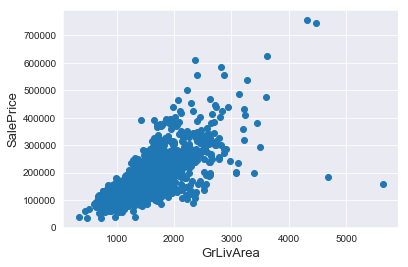

In [700]:
# Exploring the outliers
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [701]:
#We can see at the bottom right two with extremely large GrLivArea that are of a low price. 
#These values are huge oultliers. Therefore, we can safely delete them.

In [702]:
train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.000,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,60,RL,313.000,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [703]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

In [704]:
train.shape

(1458, 80)

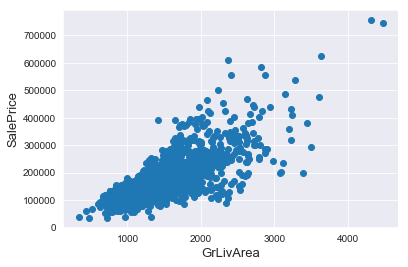

In [705]:
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


 mu = 180932.92 and sigma = 79467.79



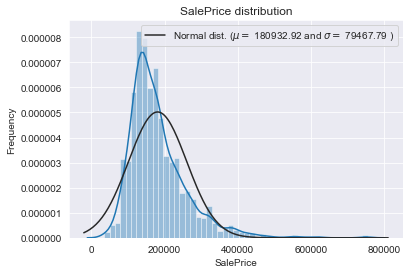

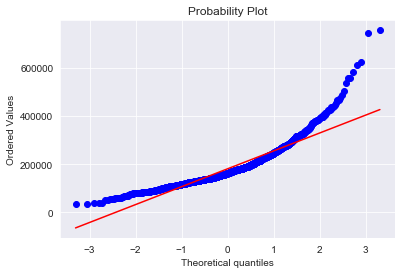

In [706]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [707]:
#The target variable is right skewed. 
#As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.


 mu = 12.02 and sigma = 0.40



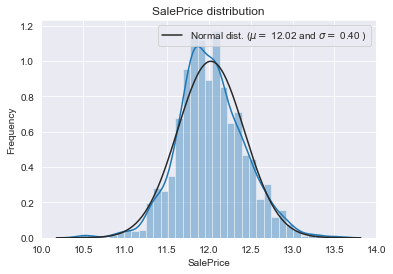

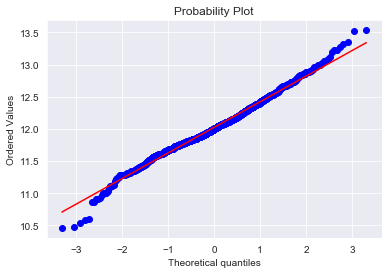

In [708]:
#Log-transformation of the target variable
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

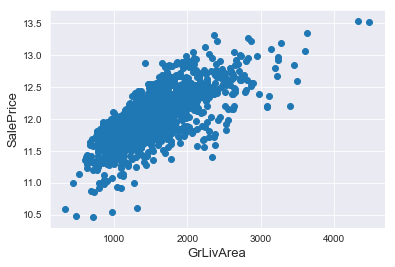

In [709]:
#Check the graphic again
#Older versions of this scatter plot (previous to log transformations), had a conic shape. 
#As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! 
#Just by ensuring normality in some variables, we solved the homoscedasticity problem.

fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [710]:
#---------------------------Features engineering-------------------------------

In [711]:
train.SalePrice.isnull().sum()

0

In [712]:
#let's first concatenate the train and test data in the same dataframe

ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


In [713]:
pd.DataFrame(y_train).isnull().sum()

0    0
dtype: int64

In [714]:
#Missing Data

In [715]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451
GarageYrBlt,5.451


Text(0.5, 1.0, 'Percent missing data by feature')

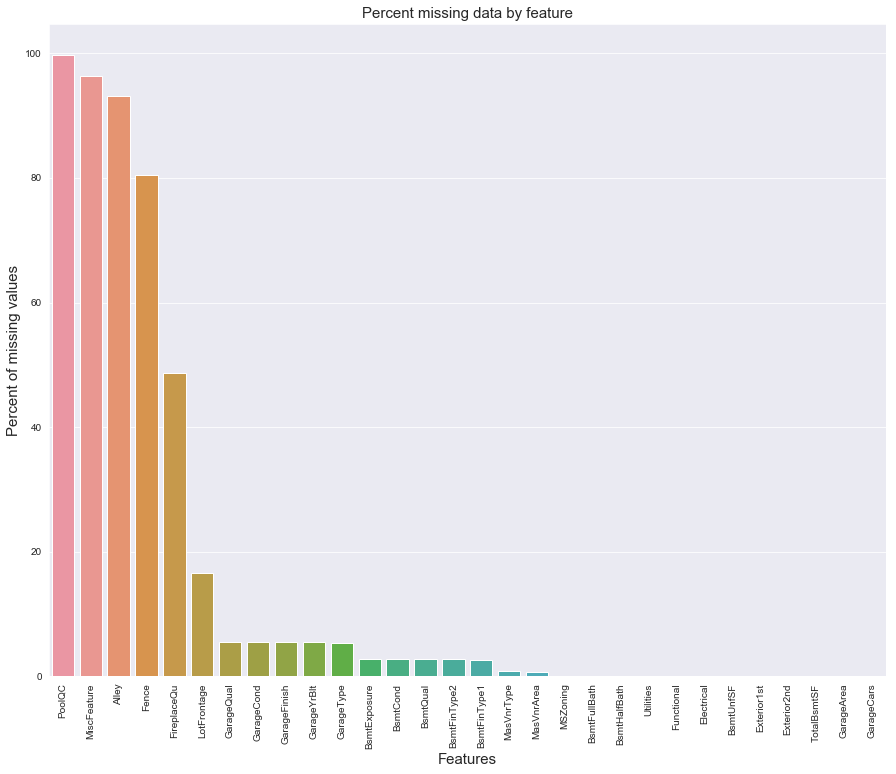

In [716]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [717]:
#Data Correlation

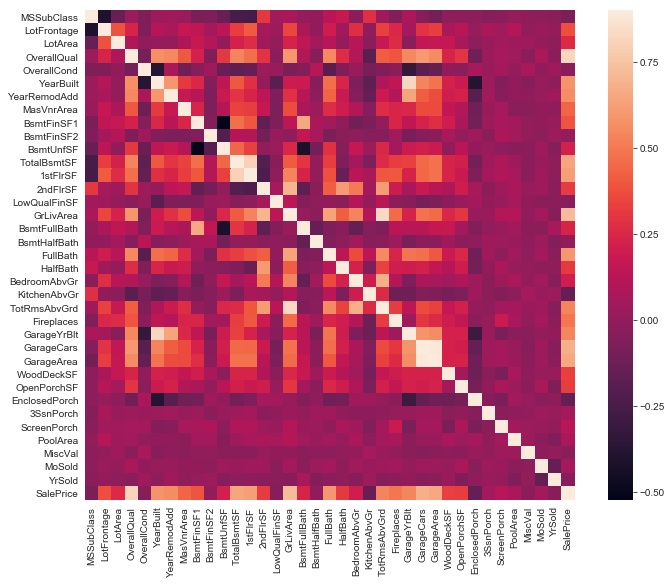

In [718]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [719]:
#-----------------------------------------Imputing missing values-------------------------------

In [720]:
#We impute them by proceeding sequentially through features with missing values

In [721]:
#PoolQC : data description says NA means "No Pool". 
#That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

#MiscFeature : data description says NA means "no misc feature"
#Alley : data description says NA means "no alley access"
#Fence : data description says NA means "no fence"
#FireplaceQu : data description says NA means "no fireplace"

all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")


In [722]:
#LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses 
#in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [723]:
#GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [724]:
#GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [725]:
#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [726]:
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, 
# NaN means that there is no basement.

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [727]:
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [728]:
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'

all_data['MSZoning'] = all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [729]:
#Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . 
#Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

all_data = all_data.drop(['Utilities'], axis=1)

In [730]:
#Functional : data description says NA means typical

all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [731]:
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.

all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [732]:
#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.

all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [733]:
#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [734]:
#SaleType : Fill in again with most frequent which is "WD"

all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [735]:
#MSSubClass : Na most likely means No building class. We can replace missing values with None

all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [736]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [737]:
#--------------------------------More features engineering---------------------------------------------

In [738]:
#Transforming some numerical variables that are categorical

In [739]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [740]:
#Label Encoding some categorical variables that may contain information in their ordering set

from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


In [741]:
all_data.shape

(2917, 78)

In [742]:
pd.DataFrame(y_train).isnull().sum()

0    0
dtype: int64

In [743]:
#----------------------Adding one more important feature----------------------------------------------------

In [744]:
#Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, 
#first and second floor areas of each house

In [745]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [746]:
all_data.dtypes[all_data.dtypes != "object"].index

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Fence',
       'FireplaceQu', 'Fireplaces', 'FullBath', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageYrBlt',
       'GrLivArea', 'HalfBath', 'HeatingQC', 'KitchenAbvGr', 'KitchenQual',
       'LandSlope', 'LotArea', 'LotFrontage', 'LotShape', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC',
       'ScreenPorch', 'Street', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold', 'TotalSF'],
      dtype='object')

In [747]:
all_data.dtypes[all_data.dtypes == "object"].index

Index(['BldgType', 'Condition1', 'Condition2', 'Electrical', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'GarageType', 'Heating', 'HouseStyle',
       'LandContour', 'LotConfig', 'MSZoning', 'MasVnrType', 'MiscFeature',
       'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType'],
      dtype='object')

In [748]:
#-------------------------------------------Skewed features-------------------------------------------------

In [749]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


In [750]:
# Box Cox Transformation of (highly) skewed features

#We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x .
#Note that setting  λ=0  is equivalent to log1p used above for the target variable.

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


In [751]:
#-----------------------------------Getting dummy categorical features------------------------------------

In [752]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [753]:
all_data.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
1stFlrSF,2917.000,12.416,0.920,9.280,11.756,12.349,13.063,17.321
2ndFlrSF,2917.000,4.841,5.633,0.000,0.000,0.000,11.163,14.283
3SsnPorch,2917.000,0.101,0.899,0.000,0.000,0.000,0.000,10.313
Alley,2917.000,0.713,0.166,0.000,0.730,0.730,0.730,1.194
BedroomAbvGr,2917.000,1.472,0.273,0.000,1.194,1.541,1.541,2.603


In [754]:
#Getting the new train and test sets.

train = all_data[:ntrain]
test = all_data[ntrain:]

In [755]:
pd.DataFrame(y_train).isnull().sum()

0    0
dtype: int64

In [756]:
train.shape

(1458, 220)

In [757]:
y_train.shape

(1458,)

In [758]:
pd.DataFrame(y_train).isnull().sum()

0    0
dtype: int64

In [759]:
#Combining Features and Label in train Data

train["SalePrice"] = y_train
train.shape

(1458, 221)

In [760]:
#--------------------------------------------Modelling--------------------------------------------------------------------------

In [761]:
# Import the models and set SEED for reproducability

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Lasso, Ridge, 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, AdaBoostRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

SEED = 42

In [762]:
# Applying Train Test split

X_train, X_test, y_train, y_test = train_test_split(train.drop(["SalePrice"], axis=1), train["SalePrice"], test_size=0.2, random_state=2)
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (1166, 220)
X_test shape (292, 220)
y_train shape (1166,)
y_test shape (292,)


In [763]:
X_train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
1255,14.162,0.000,0.000,0.730,1.194,1.820,0.730,12.910,0.000,1.194,...,0,0,0,0,0,0,0,0,0,1
476,13.289,0.000,0.000,0.730,1.541,1.820,0.730,12.108,0.000,1.194,...,0,0,0,0,0,0,0,0,0,1
411,12.279,0.000,0.000,0.730,1.541,1.820,1.194,12.279,0.000,2.056,...,0,0,0,0,0,0,0,0,0,1
708,11.843,0.000,0.000,0.730,1.541,1.820,1.541,0.000,0.000,2.260,...,0,0,0,0,0,0,0,0,0,1
839,11.541,11.039,0.000,0.730,1.820,1.820,1.541,7.566,0.000,0.730,...,0,0,0,0,0,0,0,0,0,1


In [764]:
#Instantiation base models

dt = DecisionTreeRegressor(random_state=SEED)
lasso = Lasso(random_state=SEED)
ridge = Ridge(random_state=SEED)

In [765]:
# Defining Hyperparamaters for the base parameters

params_dt = {"max_depth" : list(np.round(np.linspace(1, 25, 5, endpoint=True))),
             "min_samples_leaf" : list(np.linspace(0.001, 0.2, 10, endpoint=True)),
             "min_samples_split" : list(np.linspace(0.02, 0.2, 10, endpoint=False)),
             "max_features" : list(np.arange(60,90,2))
             } 

params_lasso = {"alpha" : np.logspace(-4, 0, 5)}

params_ridge = {"alpha" : np.logspace(-3, 0, 5)}

In [766]:
def model_performance(model, hyperparam_dict):
    grid_cv = GridSearchCV(estimator=model, param_grid=hyperparam_dict, cv=5, scoring="neg_mean_squared_error", verbose=1, n_jobs=-1)
    grid_cv.fit(X_train,y_train)
    rmse_train = np.sqrt(-grid_cv.best_score_)
    print("Best RMSE while training model = ", rmse_train)
    print("Best parameters: ",grid_cv.best_params_)
    y_pred = grid_cv.best_estimator_.predict(X_test)
    rmse_test = MSE(y_test, y_pred)**0.5
    print("Best RMSE while predicting = ", rmse_test)
    if (rmse_test<rmse_train):
        print("No Overfitting")
    else:
        print("Case of Overfitting, reduce model complexity")
    
    r2 = r2_score(y_test, y_pred)
    print("R squared = ", r2)

In [767]:
model_performance(lasso, params_lasso)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best RMSE while training model =  0.11826644973050376
Best parameters:  {'alpha': 0.001}
Best RMSE while predicting =  0.11442610319847575
No Overfitting
R squared =  0.9182380016583885


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.5s finished


In [768]:
lasso = Lasso(alpha=0.001)
lasso_coeff = lasso.fit(X_train,y_train).coef_

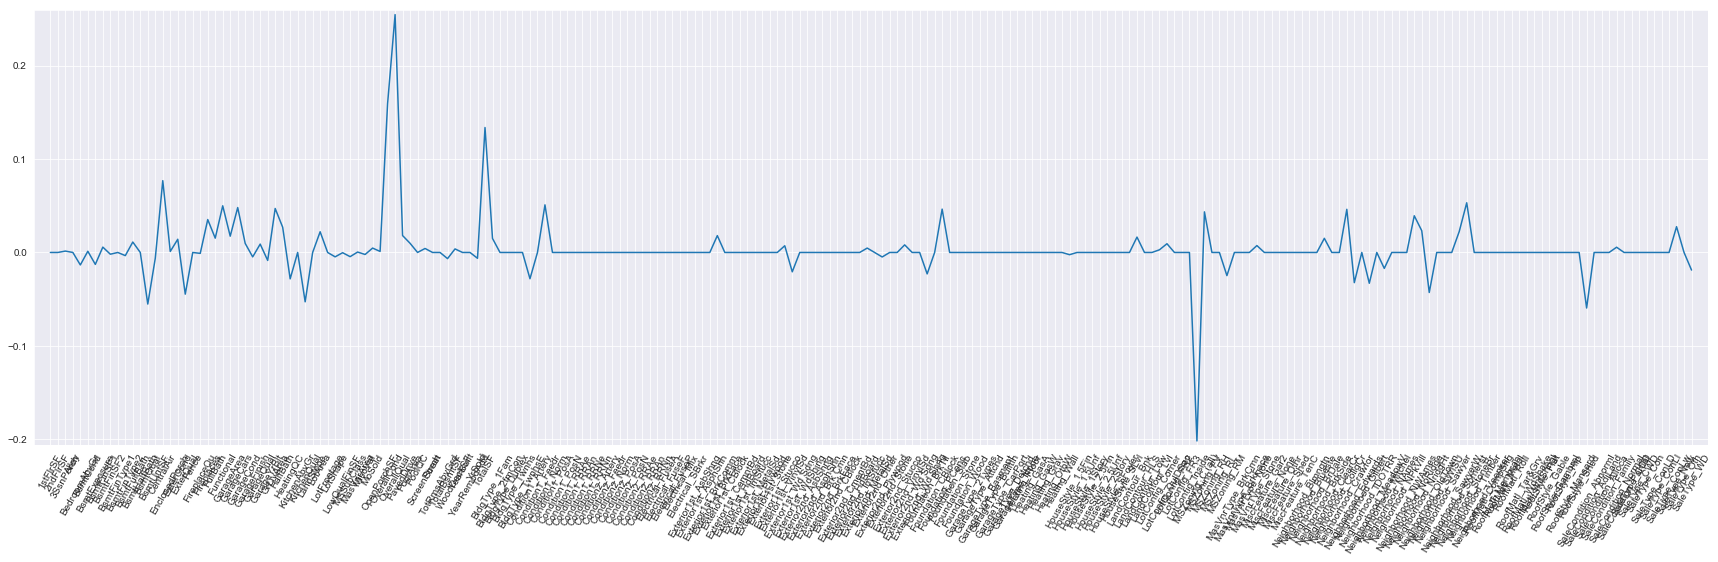

In [769]:
#Plotting Coefficients against features

f, ax = plt.subplots(figsize=(30, 8))
plt.plot(range(len(X_train.columns)), lasso_coeff)
plt.xticks(range(len(X_train.columns)), X_train.columns.values, rotation=60)
plt.margins(0.01)
plt.show()

In [770]:
lasso.intercept_

8.013352194880637

In [771]:
col_coeff = pd.DataFrame(X_train.columns)
col_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
col_coeff.head()

,0,Coefficient Estimate
0,1stFlrSF,0.000
1,2ndFlrSF,-0.000
2,3SsnPorch,0.001
3,Alley,0.000
4,BedroomAbvGr,-0.013


In [772]:
#Selecting Coefficients with non-zero values

select_feats = col_coeff[col_coeff['Coefficient Estimate']!=0][0]
select_feats.values

array(['3SsnPorch', 'BedroomAbvGr', 'BsmtCond', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType2', 'BsmtFullBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'EnclosedPorch',
       'ExterCond', 'ExterQual', 'FireplaceQu', 'Fireplaces', 'FullBath',
       'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'HeatingQC', 'KitchenQual', 'LotArea', 'LotShape',
       'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive',
       'PoolArea', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF', 'YrSold',
       'TotalSF', 'BldgType_1Fam', 'Condition1_Artery', 'Condition1_Norm',
       'Exterior1st_BrkFace', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior2nd_MetalSd',
       'Exterior2nd_Plywood', 'Exterior2nd_VinylSd', 'Foundation_BrkTil',
       'Foundation_PConc', 'HouseStyle_1.5Fin', 'LandContour_HLS',
 

In [773]:
X_train[select_feats].head()

,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType2,BsmtFullBath,BsmtQual,BsmtUnfSF,...,Neighborhood_Mitchel,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Somerst,Neighborhood_StoneBr,SaleCondition_Abnorml,SaleCondition_Normal,SaleType_New,SaleType_WD
1255,0.000,1.194,1.820,0.730,12.910,0.000,2.260,0.730,1.194,11.039,...,0,1,0,0,0,0,0,1,0,1
476,0.000,1.541,1.820,0.730,12.108,0.000,2.260,0.730,1.194,10.190,...,0,0,0,0,0,0,0,1,0,1
411,0.000,1.541,1.820,1.194,12.279,0.000,2.260,0.730,1.820,0.000,...,0,0,0,0,0,0,0,1,0,1
708,0.000,1.541,1.820,1.541,0.000,0.000,2.260,0.000,1.820,11.756,...,0,0,0,0,0,0,1,0,0,1
839,0.000,1.820,1.820,1.541,7.566,0.000,2.260,0.000,1.820,10.352,...,0,0,0,0,0,0,0,1,0,1


In [774]:
lasso_coeff = lasso.fit(X_train[select_feats],y_train).coef_

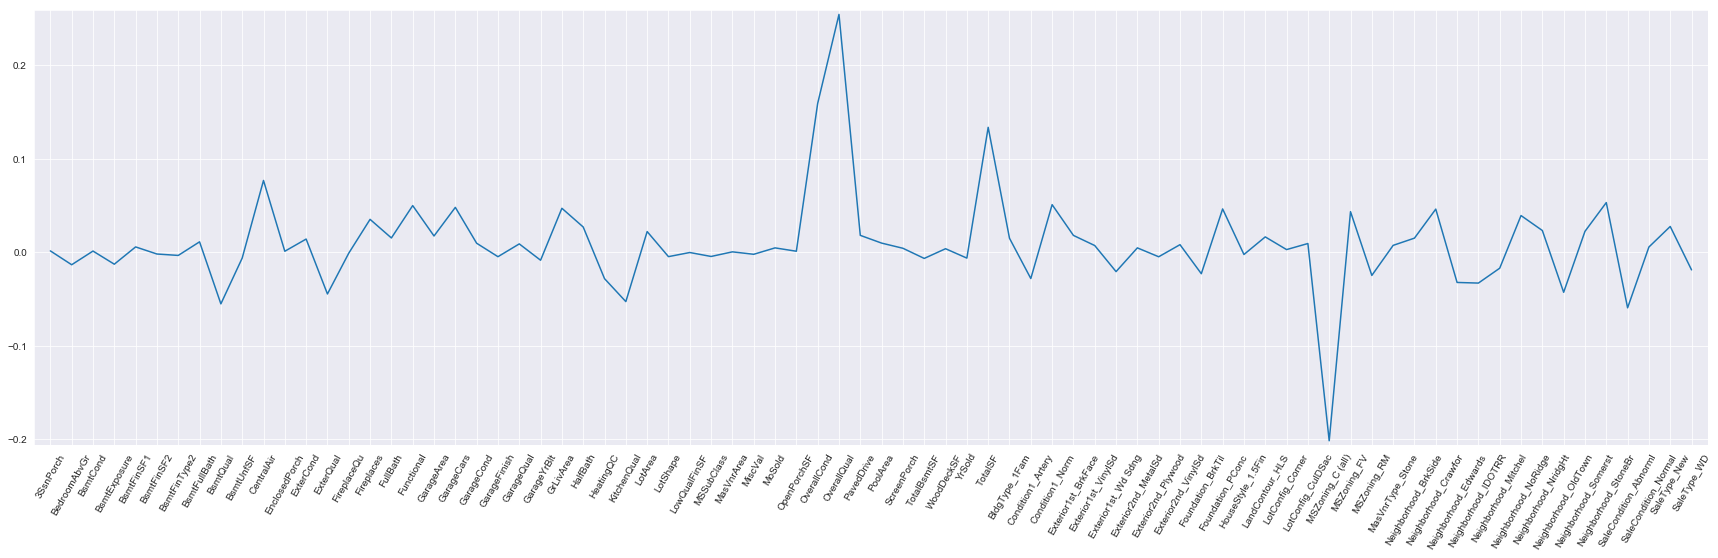

In [775]:
f, ax = plt.subplots(figsize=(30, 8))
plt.plot(range(len(X_train[select_feats].columns)), lasso_coeff)
plt.xticks(range(len(X_train[select_feats].columns)), X_train[select_feats].columns.values, rotation=60)
plt.margins(0.01)
plt.show()

In [776]:
#Implementing the Lasso model with the selected features

grid_cv = GridSearchCV(estimator=lasso, param_grid=params_lasso, cv=5, scoring="neg_mean_squared_error", verbose=1, n_jobs=-1)
grid_cv.fit(X_train[select_feats],y_train)
rmse_train = np.sqrt(-grid_cv.best_score_)
print("Best RMSE while training model = ", rmse_train)
print("Best parameters: ",grid_cv.best_params_)
y_pred = grid_cv.best_estimator_.predict(X_test[select_feats])
rmse_test = MSE(y_test, y_pred)**0.5
print("Best RMSE while predicting = ", rmse_test)
r2 = r2_score(y_test, y_pred)
print("R squared = ", r2)

#Notheworthy points, we received a new value for the hyperparameter alpha=0.0001
#Also, there is no overfitting

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best RMSE while training model =  0.11401721646124921
Best parameters:  {'alpha': 0.0001}
Best RMSE while predicting =  0.11397021274962857
R squared =  0.9188882075031315


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished


In [777]:
#To make the model very sensitive to outliers we use the sklearn's Robustscaler() method on pipeline

from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

steps = [("robust_scaler", RobustScaler()),
         ("lasso", Lasso(alpha=0.0001))]
lasso_pileline = Pipeline(steps)
lasso_pileline.fit(X_train[select_feats],y_train)
y_pred = lasso_pileline.predict(X_test[select_feats])
rmse=MSE(y_test, y_pred)**0.5
print("RMSE = ", rmse)
r2 = r2_score(y_test, y_pred)
print("R squared = ", r2)

#RMSE is reduced further

RMSE =  0.11390684818043231
R squared =  0.9189783746602578


In [778]:
model_performance(ridge, params_ridge)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best RMSE while training model =  0.12267813642176381
Best parameters:  {'alpha': 1.0}
Best RMSE while predicting =  0.11523193664900823
No Overfitting
R squared =  0.9170823465961442


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished


In [779]:
#To make the model very sensitive to outliers we use the sklearn's Robustscaler() method on pipeline

from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

steps = [("robust_scaler", RobustScaler()),
         ("ridge", Ridge(alpha=1))]
ridge_pileline = Pipeline(steps)
ridge_pileline.fit(X_train[select_feats],y_train)
y_pred = ridge_pileline.predict(X_test[select_feats])
rmse=MSE(y_test, y_pred)**0.5
print("RMSE = ", rmse)
r2 = r2_score(y_test, y_pred)
print("R squared = ", r2)

#RMSE is reduced further

RMSE =  0.11412692125128106
R squared =  0.9186649974927195


In [780]:
#Hyperparameter tuning for Decision Tree

model_performance(dt, params_dt)

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 2880 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 7380 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 13680 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 21780 tasks      | elapsed:   57.0s
[Parallel(n_jobs=-1)]: Done 31680 tasks      | elapsed:  1.4min


Best RMSE while training model =  0.1839682919715843
Best parameters:  {'max_depth': 13.0, 'max_features': 80, 'min_samples_leaf': 0.001, 'min_samples_split': 0.02}
Best RMSE while predicting =  0.18290577441261766
No Overfitting
R squared =  0.7910914983643742


[Parallel(n_jobs=-1)]: Done 37500 out of 37500 | elapsed:  1.6min finished


In [781]:
# Evaluating the Important features for Pruning based on the best parameters

dt = DecisionTreeRegressor(max_depth=13.0, max_features=80, min_samples_leaf=0.001, min_samples_split=0.02, random_state=SEED)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
rmse = MSE(y_test, y_pred)**0.5
print("RMSE = ", rmse)
r2 = r2_score(y_test, y_pred)
print("R squared = ", r2)

RMSE =  0.18290577441261766
R squared =  0.7910914983643742


In [782]:
#Having a look at the Important Features

features = pd.Series(dt.feature_importances_, index=X_train.columns)
imp_features = features[features.values!=0].index.values
imp_features

array(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinType1', 'BsmtUnfSF', 'CentralAir', 'EnclosedPorch',
       'ExterQual', 'Fireplaces', 'GarageArea', 'GarageCars',
       'GarageFinish', 'GarageYrBlt', 'GrLivArea', 'HalfBath',
       'HeatingQC', 'KitchenQual', 'LotArea', 'LotFrontage', 'MSSubClass',
       'MasVnrArea', 'MoSold', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'TotalSF', 'Exterior2nd_VinylSd',
       'Foundation_BrkTil', 'GarageType_Attchd', 'GarageType_Detchd',
       'HouseStyle_2Story', 'MSZoning_C (all)', 'SaleCondition_Normal'],
      dtype=object)

In [783]:
#Number of Important features 

X_train[imp_features].shape[1]

39

In [784]:
#Optimizing the Hyper-parameters again based on the selected features

params_dt = {"max_depth" : list(np.linspace(1, 10, 10, endpoint=True)),
             "min_samples_leaf" : list(np.linspace(0.001, 0.2, 10, endpoint=True)),
             "min_samples_split" : list(np.linspace(0.02, 0.2, 10, endpoint=False)),
             "max_features" : list(range(30,X_train[imp_features].shape[1]))}

In [785]:
#Applying Grid Search CV on the pruned tree

grid_cv = GridSearchCV(estimator=dt, param_grid=params_dt, cv=5, scoring="neg_mean_squared_error", verbose=1, n_jobs=-1)
grid_cv.fit(X_train[imp_features],y_train)
rmse_train = np.sqrt(-grid_cv.best_score_)
print("Best RMSE while training model = ", rmse_train)
print("Best parameters: ",grid_cv.best_params_)
y_pred = grid_cv.best_estimator_.predict(X_test[imp_features])
rmse_test = MSE(y_test, y_pred)**0.5
print("RMSE while predicting = ", rmse_test)
r2 = r2_score(y_test, y_pred)
print("R squared = ", r2)

Fitting 5 folds for each of 9000 candidates, totalling 45000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 556 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 5056 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 12556 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 23056 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 36556 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 45000 out of 45000 | elapsed:  1.5min finished


Best RMSE while training model =  0.18193412695718078
Best parameters:  {'max_depth': 8.0, 'max_features': 32, 'min_samples_leaf': 0.023111111111111114, 'min_samples_split': 0.02}
RMSE while predicting =  0.18652204799757505
R squared =  0.7827490762612384


In [786]:
#The final Decision tree after Pruning nand Hyperparameter tuning is below along with the scores

dt = DecisionTreeRegressor(max_depth=8.0, max_features=32, min_samples_leaf=0.023, min_samples_split=0.02, random_state=SEED)

dt.fit(X_train[imp_features],y_train)
y_pred = dt.predict(X_test[imp_features])
rmse_test = MSE(y_test, y_pred)**0.5
print("RMSE while predicting = ", rmse_test)
r2 = r2_score(y_test, y_pred)
print("R squared = ", r2)

RMSE while predicting =  0.18652204799757505
R squared =  0.7827490762612384


In [787]:
# As observed, we narrowed down to 78 Features through Lasso and 39 Features through Decision Tree
# Now, we will also try "Select K Best" and select top 78 columns

In [788]:
def select_kbest_reg(X, y, k):
    feat_selector = SelectKBest(f_regression, k=k)
    _ = feat_selector.fit(X, y)
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = X.columns
    
    return feat_scores 

In [789]:
#Selecting the top 78 columns

kbest_df = select_kbest_reg(X_train, y_train, 78)

C:\Users\chandan\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\chandan\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\chandan\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\chandan\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [790]:
kbest_cols = kbest_df[kbest_df.Support==True].Attribute
#kbest_cols

In [791]:
kbest_df.sort_values(['F Score'],ascending=False).head(5)

,F Score,P Value,Support,Attribute
58,2434.579,0.000,True,TotalSF
46,2159.997,0.000,True,OverallQual
30,1369.836,0.000,True,GrLivArea
25,842.234,0.000,True,GarageCars
0,730.001,0.000,True,1stFlrSF


In [792]:
kbest_score = kbest_df[kbest_df.Support==True]["F Score"]
#kbest_score

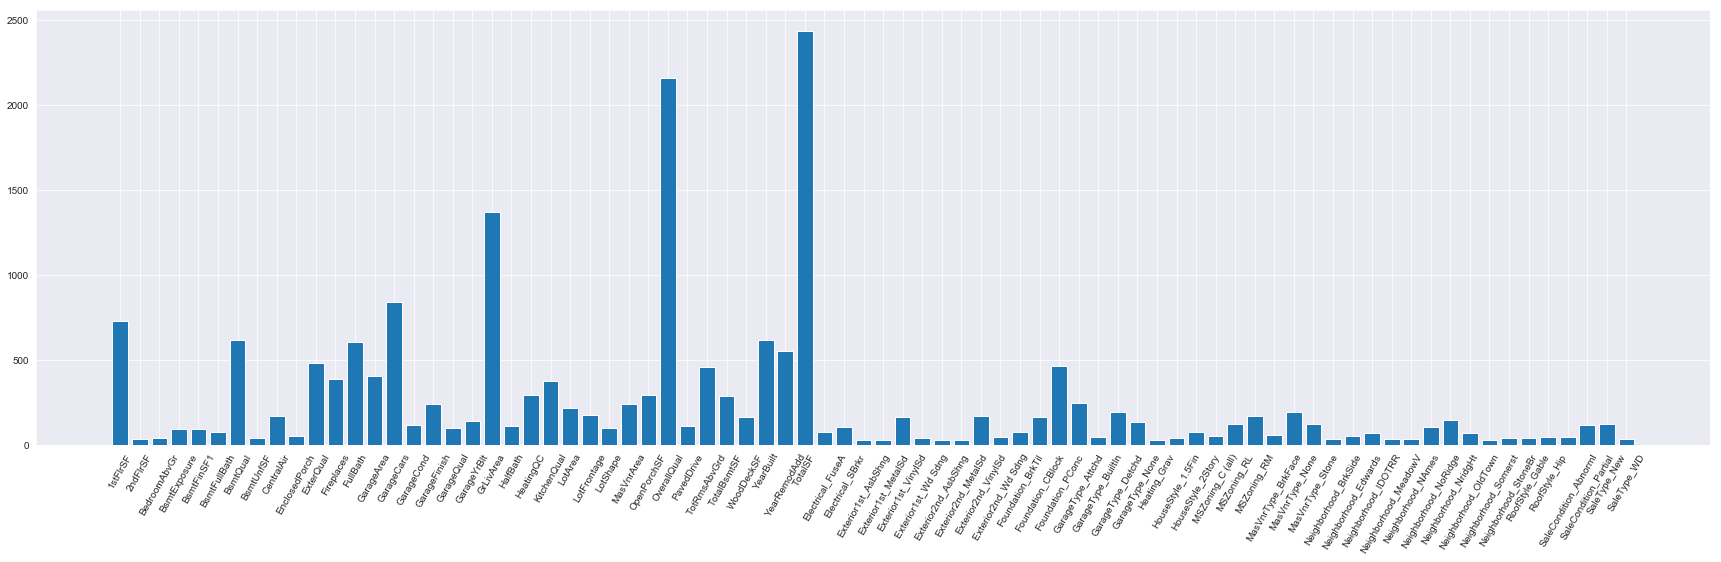

In [793]:
f, ax = plt.subplots(figsize=(30, 8))
plt.bar(range(len(kbest_cols.values)), kbest_score.values)
plt.xticks(range(len(kbest_cols.values)), kbest_cols.values, rotation=60)
plt.show()

In [794]:
X_train_k = X_train[kbest_cols]
X_test_k = X_test[kbest_cols]

In [795]:
#Now applying the following models RandomForestRegressor,  GradientBoostingRegressor, AdaBoostRegressor

In [796]:
rf = RandomForestRegressor(n_estimators=1200, max_features="auto", random_state=SEED)
rf.fit(X_train_k, y_train)
y_pred = rf.predict(X_test_k)
rmse_test = MSE(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)
print("RMSE : ", rmse)
print("R2 :", r2)

RMSE :  0.18290577441261766
R2 : 0.8772199901441909


In [797]:
RandomForestRegressor(n_estimators=1100, max_features="auto", random_state=SEED)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [798]:
params_rf = {'max_depth': list(np.linspace(30, 40, 3)),
             'min_samples_split': list(np.linspace(0.02, 0.5, 3, endpoint=False)),
             'min_samples_leaf': list(np.linspace(0.001, 0.2, 3, endpoint=True))}

In [799]:
model_performance(rf,params_rf)

#Refering to the model's performance with and without tuning, it seems that although the R-squared score is slightly better in the previious
# RF model without hyper-parameter tuning, the RMSE has been reduced significantly in the tuned model.

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  2.9min finished


Best RMSE while training model =  0.14480284410738564
Best parameters:  {'max_depth': 30.0, 'min_samples_leaf': 0.001, 'min_samples_split': 0.02}
Best RMSE while predicting =  0.14244598526720345
No Overfitting
R squared =  0.8732926791746443


In [800]:
#Now applying Gradient Boosting

gb = GradientBoostingRegressor(random_state=SEED)

gb.fit(X_train_k, y_train)
y_pred = gb.predict(X_test_k)
rmse_test = MSE(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)
print("RMSE : ", rmse)
print("R2 :", r2)

RMSE :  0.18290577441261766
R2 : 0.8914110046977415


In [801]:
#Considering the cost of computation we will tune only 1 Hyper-parameter

params_gb = {'n_estimators': list(int(x) for x in np.linspace(1050, 1060, 3))}

In [802]:
model_performance(gb,params_gb)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   21.8s finished


Best RMSE while training model =  0.12347458107132439
Best parameters:  {'n_estimators': 1050}
Best RMSE while predicting =  0.11843025172046186
No Overfitting
R squared =  0.912415634965322


In [803]:
#Now applying Adaptive Boosting

adb = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), random_state=SEED)

adb.fit(X_train_k, y_train)
y_pred = adb.predict(X_test_k)
rmse_test = MSE(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)
print("RMSE : ", rmse)
print("R2 :", r2)

RMSE :  0.18290577441261766
R2 : 0.8687290816867415


In [804]:
#Considering the cost of computation we will tune only 1 Hyper-parameter

params_adb = {'n_estimators': list(int(x) for x in np.linspace(1050, 1060, 3))}

In [805]:
model_performance(adb,params_adb)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.7min finished


Best RMSE while training model =  0.13834716175049291
Best parameters:  {'n_estimators': 1050}
Best RMSE while predicting =  0.13356930438008813
No Overfitting
R squared =  0.8885924536309009


In [806]:
#After applying all the algorithms it was noticed that 3 Models were exceptionally good, although the rest were also close:
# Lasso
# Ridge
# Gradient Boosting

In [807]:
#We will be applying Gradient Boosting on our test data "test" with "kbest_cols"

test["SalePrice"] = gb.predict(test[kbest_cols])

In [808]:
test["SalePrice"].head()

1458   11.731
1459   11.980
1460   12.140
1461   12.163
1462   12.097
Name: SalePrice, dtype: float64

In [809]:
#If we recall, we had applied "log1p" transformation for noemalization

In [810]:
test["SalePrice_Actual"] = np.e**(test["SalePrice"])

In [811]:
#The final Sales Price are here

test["SalePrice_Actual"].head()

1458   124426.013
1459   159605.031
1460   187236.081
1461   191545.759
1462   179381.696
Name: SalePrice_Actual, dtype: float64

In [812]:
#Thank you for your Patience